# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')


Then, read in your dataset:

In [34]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [35]:
len(df)

400

In [39]:
#Missing data:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer: 400 observations. But some data is missing (5 cells are NaNs).

> ### Question 2.  Create a summary table.

In [36]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [37]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [38]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: GRE has larger range between min and max, GRE's mean is also higher.

> ### Question 4.  Drop data points with missing data.

In [40]:
df = df.dropna()
len(df)

397

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [41]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [42]:
# Also NaN values dissapeared when describing data
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [43]:
df.gre.unique()

array([ 380.,  660.,  800.,  640.,  520.,  760.,  560.,  400.,  540.,
        700.,  440.,  480.,  780.,  360.,  500.,  600.,  680.,  620.,
        580.,  460.,  740.,  300.,  720.,  340.,  420.,  220.])

Answer: Sum of NaN values is 0. NaN values disappeared when describing data. Also, we can check for unique values of each variable to make sure there are no NaNs.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

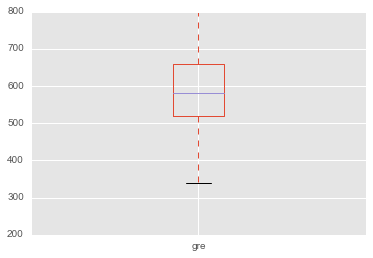

In [11]:
df.gre.plot(kind = 'box')

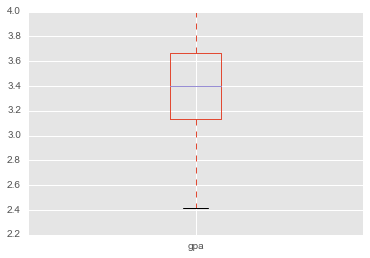

In [12]:
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: Boxplots show 25%, median, 75%, range, IQR, outliers.

GRE has 2 outliers.
GPA has 1 outlier.

> ### Question 8.  Plot the distribution of each variable.

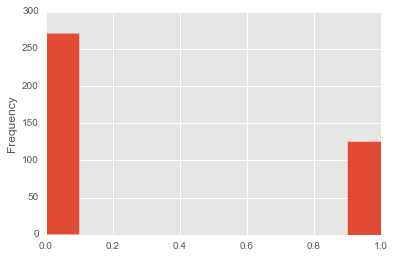

In [13]:
df.admit.plot(kind = 'hist')

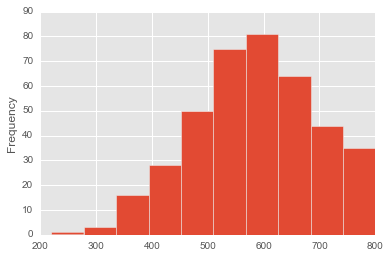

In [14]:
df.gre.plot(kind = 'hist')

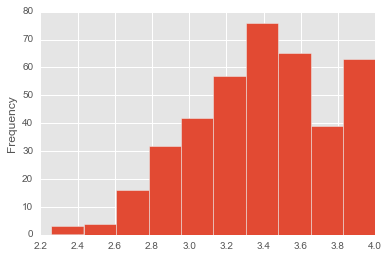

In [15]:
df.gpa.plot(kind = 'hist')

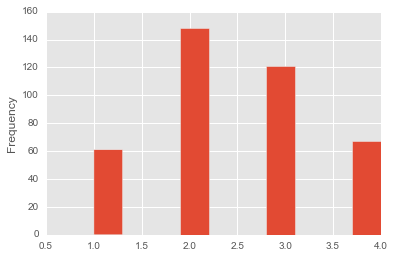

In [16]:
df.prestige.plot(kind = 'hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [25]:
df.mean()

admit         0.317380
gre         587.858942
gpa           3.392242
prestige      2.488665
dtype: float64

In [27]:
df.median()

admit         0.0
gre         580.0
gpa           3.4
prestige      2.0
dtype: float64

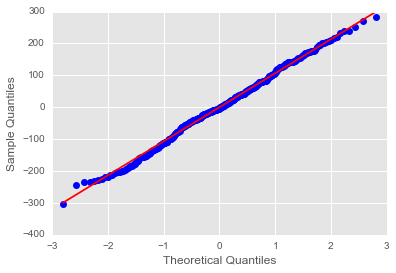

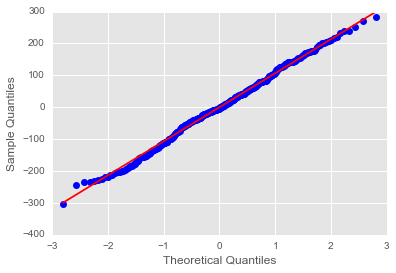

In [48]:
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()
sm.qqplot(model.resid, line = 's')

Answer: We would meet the requirement, the distribution doesn't need to be corrected. Looks like gre and gpa data is normally distributed.

> ### Question 10.  Create a correlation matrix for the dataset

In [53]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: The largest correlation is between gre and gpa, although it is still very small, they can be potentially collinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
1. Tidy data (if still needed).
2. Draw scatter plot, get rid of outliers (if needed).
3. One-hot encoding for variables.
4. Build a statistical model, check model summary, interpret the coefficients.
5. Count the probabilities.

> ### Question 13.  What is your hypothesis?

Answer: Students school prestige data will allow us to predict how likely a student will be admitted into graduate school. Students from schools with higher prestige are more likely to be admitted. 